In [ ]:
from google.colab import drive;
drive.mount("/content/drive");

Mounted at /content/drive


In [ ]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [ ]:
df_train = pd.read_csv("../content/drive/Shareddrives/Soft Computing Lab/Dataset/Go emotion dataset/data/Go Emotion preprocessed.csv");

happiness    18791
neutral      14356
anger         6674
surprise      5040
sadness       2920
worry          699
Name: sentiment, dtype: int64
[0.38760314 0.29612211 0.13766502 0.1039604  0.06023102 0.01441832]
[0.014418316831683169, 0.06023102310231023, 0.10396039603960396, 0.13766501650165017, 0.29612211221122114, 0.38760313531353136]
['happiness', 'neutral', 'anger', 'surprise', 'sadness', 'worry']
happiness    18791
neutral      14356
anger         6674
surprise      5040
sadness       2920
worry          699
Name: sentiment, dtype: int64


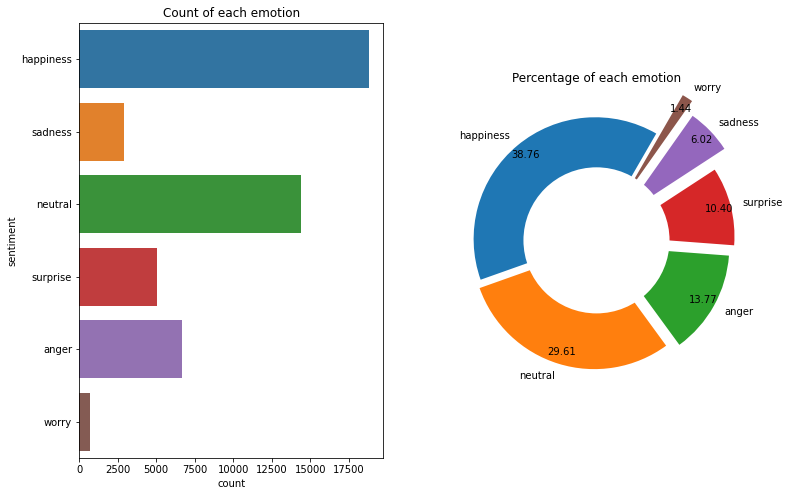

In [ ]:
col = 'sentiment'

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
print(df_train[col].dropna().value_counts());
print((np.array(list(df_train[col].dropna().value_counts()))/sum(list(df_train[col].dropna().value_counts()))));
explode = list((np.array(list(df_train[col].dropna().value_counts()))/sum(list(df_train[col].dropna().value_counts())))[::-1])
print(explode);
labels = ['happiness','neutral','anger','surprise','sadness','worry'];
print(labels);
sizes = df_train[col].value_counts()
print(sizes)
#ax.pie(sizes, explode=explode, colors=bo, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%.2f', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y =col, data = df_train, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

In [ ]:
df_train['char_length'] = df_train['content'].apply(lambda x : len(x))
df_train['token_length'] = df_train['content'].apply(lambda x : len(x.split(" ")))
print(df_train);


       Unnamed: 0  ... token_length
0           12020  ...            7
1           38945  ...            7
2           45097  ...            9
3           28341  ...           16
4           43073  ...           20
...           ...  ...          ...
48475        2888  ...           23
48476       18873  ...            8
48477       35979  ...           27
48478        6332  ...            3
48479        2161  ...           17

[48480 rows x 5 columns]


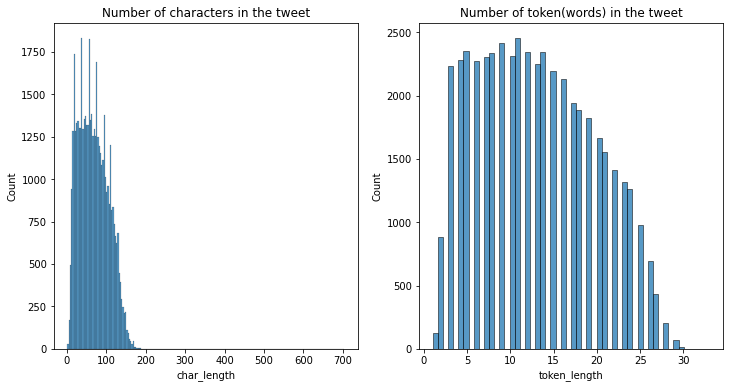

In [ ]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.histplot(df_train['char_length'], ax=ax1)
sns.histplot(df_train['token_length'], ax=ax2)
ax1.set_title('Number of characters in the tweet')
ax2.set_title('Number of token(words) in the tweet')
plt.show()

In [ ]:
!pip install inflect

In [ ]:
!pip install contractions

     |████████████████████████████████| 321 kB 5.1 MB/s 
     |████████████████████████████████| 284 kB 44.9 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85449 sha256=51f71ec0d8644fed691eb47224354ab92febb205a5f2d5922830a3c0e79b2bdc
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
!pip install bs4

In [ ]:
pip install emoji

     |████████████████████████████████| 185 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-1.5.0-py3-none-any.whl size=187457 sha256=5bddc0d565fcb076f2ab4c75fdb5dca85cf3e66ba0d389c0392b9fd8653322e6
  Stored in directory: /root/.cache/pip/wheels/db/b5/f6/b39abf14e94b3d6640613bbe630a66c10ccf7a12882d064fb5
Successfully built emoji


In [ ]:

from sklearn.preprocessing import LabelEncoder;
from sklearn.model_selection import train_test_split;
import nltk;
import inflect;
import contractions;
from bs4 import BeautifulSoup;
import re, string, unicodedata;
from nltk import word_tokenize, sent_tokenize;
from nltk.corpus import stopwords;
from nltk.stem import LancasterStemmer, WordNetLemmatizer;
nltk.download('punkt');
nltk.download('stopwords');
nltk.download('wordnet');
import emoji

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", 
                       "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
                       "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
                       "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am",
                       "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", 
                       "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
                       "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
                       "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                       "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
                       "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is",
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would",
                       "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
                       "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
                       "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                       "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
                       "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", 
                       "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have",
                       "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", 'u.s':'america', 'e.g':'for example'}

punct = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-",
                 "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 
                 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', '!':' '}

mispell_dict = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater',
                'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ',
                'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can',
                'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 
                'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 
                'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 
                'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization',
                'demonetisation': 'demonetization'}

In [ ]:
def clean_text(text):
    '''Clean emoji, Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = emoji.demojize(text)
    text = re.sub(r'\:(.*?)\:','',text)
    text = str(text).lower()    #Making Text Lowercase
    text = re.sub('\[.*?\]', '', text)
    #The next 2 lines remove html text
    text = BeautifulSoup(text, 'lxml').get_text()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",", "'")
    text = re.sub(r"[^a-zA-Z?.!,¿']+", " ", text)
    return text

def clean_contractions(text, mapping):
    '''Clean contraction using contraction mapping'''    
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    for word in mapping.keys():
        if ""+word+"" in text:
            text = text.replace(""+word+"", ""+mapping[word]+"")
    #Remove Punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    text = re.sub(r"([?.!,¿])", r" \1 ", text)
    text = re.sub(r'[" "]+', " ", text)
    return text

def clean_special_chars(text, punct, mapping):
    '''Cleans special characters present(if any)'''   
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}  
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text

def correct_spelling(x, dic):
    '''Corrects common spelling errors'''   
    for word in dic.keys():
        x = x.replace(word, dic[word])
    return x

def remove_space(text):
    '''Removes awkward spaces'''   
    #Removes awkward spaces 
    text = text.strip()
    text = text.split()
    return " ".join(text)

def text_preprocessing_pipeline(text):
    '''Cleaning and parsing the text.'''
    text = clean_text(text)
    text = clean_contractions(text, contraction_mapping)
    text = clean_special_chars(text, punct, punct_mapping)
    text = correct_spelling(text, mispell_dict)
    text = remove_space(text)
    return text

Before Text Preprocessing


0                 Thanks! I'll work on this next time!
1               This comment killed me. RIP in pieces.
2    Wouldn't the powder be derived from the crysta...
3    Must not have been the [NAME] of his day... Bu...
4    Fair enough! that's useful and relevant (if an...
Name: content, dtype: object

(48480, 5)
     Unnamed: 0  ... token_length
340       17455  ...           17

[1 rows x 5 columns]


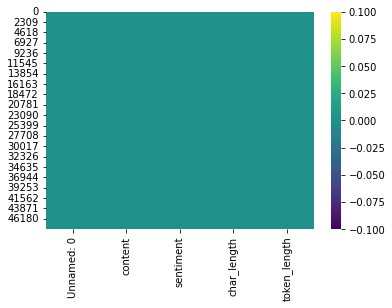

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'/'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


After Text Preprocessing


,content
0,thanks i will work on this next time
1,this comment killed me rip in pieces
2,would not the powder be derived from the cryst...
3,must not have been the of his day but seriousl...
4,fair enough that is useful and relevant if ane...


(48480, 5)
     Unnamed: 0  ... token_length
340       17455  ...           17

[1 rows x 5 columns]


In [ ]:
print("Before Text Preprocessing")
display(df_train.head()['content'])
print(df_train.shape);
print(df_train.loc[[340]])
sns.heatmap(df_train.isnull(), cmap='viridis')
plt.show()
df_train['content'] = df_train['content'].apply(text_preprocessing_pipeline)
print("After Text Preprocessing")
display(df_train.head()[['content']])
print(df_train.shape);
print(df_train.loc[[340]]);

df_train.to_csv('After_cleaning.csv');

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer;
from sklearn.model_selection import train_test_split;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.metrics import classification_report;
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve;

In [ ]:
preprocess = True
text = 'content'
target = 'sentiment'
MAX_SEQUENCE_LENGTH = 60

In [ ]:
tf = TfidfVectorizer();
print(tf.fit_transform(df_train['content'])[0])
text_tf= tf.fit_transform(df_train['content']);
# feature extract
feature_names = tf.get_feature_names()
print(feature_names);
doc = 0
# for first doc
feature_index =text_tf[doc,:].nonzero()[1]
tfidf_scores = zip(feature_index, [text_tf[doc, x] for x in feature_index])
print(tfidf_scores);
# tfidf score for first doc with featue , tfidf value
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
  print (w, s);

  (0, 24654)	0.3821488135063432
  (0, 16154)	0.49783611222035024
  (0, 24476)	0.24484194472594542
  (0, 16803)	0.29370985263388333
  (0, 27266)	0.45032655677049294
  (0, 27067)	0.342383646648617
  (0, 24342)	0.37401586202786596
['aa', 'aaa', 'aaaaaaaaaaaaaaand', 'aaaaaaaaaaaaaahhh', 'aaaaaaaaaaaaand', 'aaaaaaaaaaaah', 'aaaaaaaaaaah', 'aaaaaaand', 'aaaaaand', 'aaaaah', 'aaaaand', 'aaaagghhh', 'aaaand', 'aaah', 'aaahahahha', 'aaahhh', 'aaahhhhhh', 'aaditi', 'aaf', 'aah', 'aalll', 'aand', 'aaron', 'aarp', 'aav', 'ab', 'abandon', 'abandoned', 'abandonment', 'abandonned', 'abandons', 'abaot', 'abathur', 'abattoir', 'abba', 'abbreviated', 'abbreviation', 'abby', 'abc', 'abcds', 'abdomen', 'abduct', 'abductions', 'abel', 'aberrant', 'abetting', 'abh', 'abhorrent', 'abilities', 'ability', 'abit', 'ablation', 'able', 'abled', 'ableism', 'abnormal', 'abnormally', 'aboard', 'aboleth', 'abolish', 'abomination', 'aborigine', 'abort', 'aborted', 'abortion', 'abortions', 'abou', 'about', 'abouts', 'a

In [ ]:
train_final = df_train[['content', 'sentiment']]
print("Train DataFrame")
display(train_final.head(3))

Train DataFrame


,content,sentiment
0,thanks i will work on this next time,happiness
1,this comment killed me rip in pieces,sadness
2,would not the powder be derived from the cryst...,neutral


In [ ]:
le = LabelEncoder()
train_final['sentiment'] = le.fit_transform(train_final['sentiment'])
df = train_final
x=text_tf;
y =df[target]
print(x);
print(y);

  (0, 24654)	0.3821488135063432
  (0, 16154)	0.49783611222035024
  (0, 24476)	0.24484194472594542
  (0, 16803)	0.29370985263388333
  (0, 27266)	0.45032655677049294
  (0, 27067)	0.342383646648617
  (0, 24342)	0.37401586202786596
  (1, 17958)	0.5454809832948025
  (1, 12099)	0.18883159197903893
  (1, 20492)	0.4920992507830129
  (1, 14825)	0.23039693635341923
  (1, 13243)	0.4540426178361295
  (1, 4654)	0.36374501921923236
  (1, 24476)	0.18188888919851018
  (2, 14823)	0.4494140733227806
  (2, 5631)	0.4988012432291699
  (2, 9612)	0.19785296762424434
  (2, 6370)	0.4576101819917422
  (2, 2028)	0.1600944814296891
  (2, 18505)	0.4364815733519102
  (2, 24369)	0.1914126842628934
  (2, 16383)	0.12804867551454982
  (2, 27314)	0.1774535126011
  (3, 725)	0.4100173995888275
  (3, 12728)	0.12904286995187492
  :	:
  (48477, 7070)	0.14770387824171882
  (48477, 27148)	0.10376583843911454
  (48477, 3222)	0.21430714460656633
  (48477, 24559)	0.35017036288595976
  (48477, 24460)	0.125813190528704
  (48477, 19

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
adasyn_over_sample = ADASYN(random_state=11, n_neighbors=5,sampling_strategy='auto')

print(f"Initial set observations {x.shape[0]}")
print(f"Initial set target classes {len(y)}")
x_ada, y_ada = adasyn_over_sample.fit_resample(x, y)
print(f"Modified set observations {x_ada.shape[0]}")
print(f"Modified set target classes {len(y_ada)}")

Initial set observations 48480
Initial set target classes 48480


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Modified set observations 113956
Modified set target classes 113956


In [ ]:
from collections import Counter;
print(Counter(y));
print(Counter(y_ada));

Counter({1: 18791, 2: 14356, 0: 6674, 4: 5040, 3: 2920, 5: 699})
Counter({3: 19592, 0: 19449, 5: 18979, 4: 18837, 1: 18791, 2: 18308})


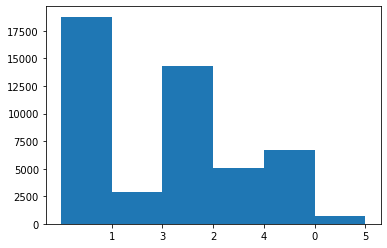

In [ ]:
labels, values = zip(*Counter(y).items())
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

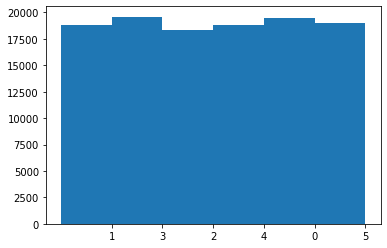

In [ ]:
labels, values = zip(*Counter(y_ada).items())
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
from sklearn.preprocessing import normalize
x_ada_norm = normalize(x_ada);
print(x_ada_norm);


  (0, 24654)	0.3821488135063432
  (0, 16154)	0.49783611222035024
  (0, 24476)	0.24484194472594542
  (0, 16803)	0.29370985263388333
  (0, 27266)	0.45032655677049294
  (0, 27067)	0.342383646648617
  (0, 24342)	0.37401586202786596
  (1, 17958)	0.5454809832948025
  (1, 12099)	0.18883159197903893
  (1, 20492)	0.4920992507830129
  (1, 14825)	0.23039693635341923
  (1, 13243)	0.4540426178361295
  (1, 4654)	0.36374501921923236
  (1, 24476)	0.18188888919851018
  (2, 14823)	0.4494140733227806
  (2, 5631)	0.4988012432291699
  (2, 9612)	0.19785296762424434
  (2, 6370)	0.4576101819917422
  (2, 2028)	0.1600944814296891
  (2, 18505)	0.4364815733519102
  (2, 24369)	0.1914126842628934
  (2, 16383)	0.12804867551454982
  (2, 27314)	0.1774535126011
  (3, 725)	0.4100173995888275
  (3, 12728)	0.12904286995187492
  :	:
  (113925, 4066)	0.30380293960207977
  (113925, 11568)	0.30727857581143847
  (113925, 13797)	0.2509226631546138
  (113925, 16759)	0.253707489025845
  (113925, 18036)	0.33958713527207024
  (1139

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_ada_norm,y_ada, test_size=0.3, random_state=42);

In [ ]:
print(x_train.shape);
print(x_test.shape);
print(y_train.shape);
print(y_test.shape);

(79769, 27710)
(34187, 27710)
(79769,)
(34187,)


In [ ]:
dt = RandomForestClassifier(random_state=42, verbose=2, class_weight='balanced_subsample',n_estimators=100,criterion='gini')
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished


In [ ]:
score = round(accuracy_score(y_test,preddt)*100,2)
print("Score:",score)

Score: 86.49


In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
cnf_matrix = confusion_matrix(y_test,preddt);
labels = ['happiness','neutral','anger','surprise','sadness','worry'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

Confusion Matrix for Decision Tree:
[[5149  134  523   45   76   11]
 [ 233 3892 1231   97  221   37]
 [ 347  501 4205   66  328   67]
 [  34   22  124 5604   18    1]
 [  82  107  270   34 5112    9]
 [   0    0    0    0    0 5607]]


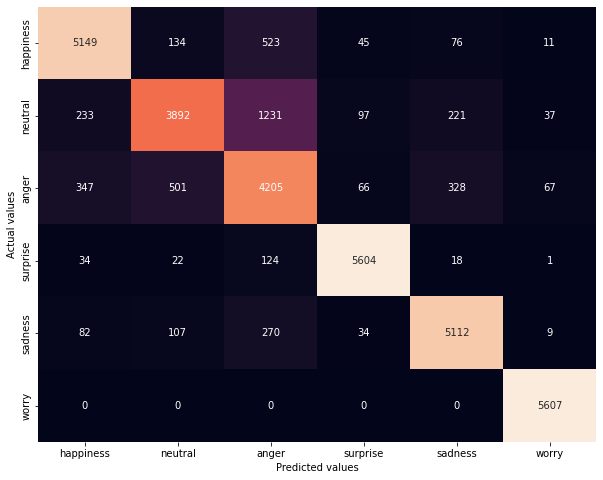

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test,preddt))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      5938
           1       0.84      0.68      0.75      5711
           2       0.66      0.76      0.71      5514
           3       0.96      0.97      0.96      5803
           4       0.89      0.91      0.90      5614
           5       0.98      1.00      0.99      5607

    accuracy                           0.86     34187
   macro avg       0.87      0.86      0.86     34187
weighted avg       0.87      0.86      0.86     34187



In [ ]:
svc=SVC(C=100.0) 
# fit classifier to training set
svc.fit(x_train,y_train)


# make predictions on test set
y_pred=svc.predict(x_test)

In [ ]:
score = round(accuracy_score(y_test,y_pred)*100,2)
print("Score:",score)

Score: 90.06


In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,y_pred))
cnf_matrix = confusion_matrix(y_test,y_pred);
labels = ['happiness','neutral','anger','surprise','sadness','worry'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

Confusion Matrix for Decision Tree:
[[5512   78  292   17   37    2]
 [ 207 4157 1112   73  151   11]
 [ 316  517 4387   49  234   11]
 [   7   16   19 5750   11    0]
 [  11   60  159    7 5377    0]
 [   0    0    0    0    0 5607]]


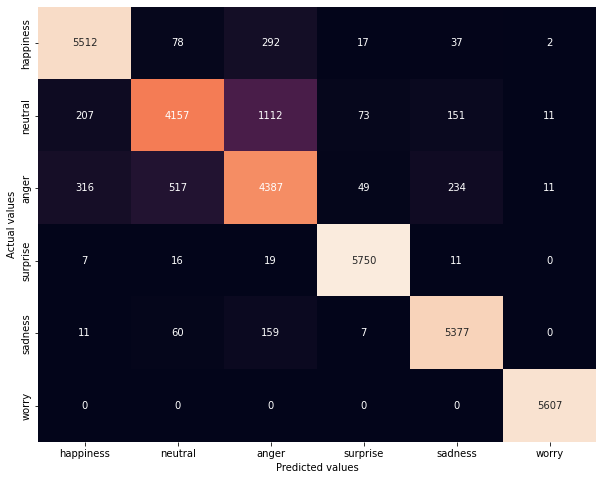

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5938
           1       0.86      0.73      0.79      5711
           2       0.73      0.80      0.76      5514
           3       0.98      0.99      0.98      5803
           4       0.93      0.96      0.94      5614
           5       1.00      1.00      1.00      5607

    accuracy                           0.90     34187
   macro avg       0.90      0.90      0.90     34187
weighted avg       0.90      0.90      0.90     34187



In [ ]:
xgbc = XGBClassifier(max_depth=16, n_estimators=1000,nthread = 6)
xgbc.fit(x_train,y_train)
prediction_xgb = xgbc.predict(x_test)

In [ ]:
score = round(accuracy_score(y_test,prediction_xgb)*100,2)
print("Score:",score)

Score: 83.72


In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,prediction_xgb))
cnf_matrix = confusion_matrix(y_test,prediction_xgb);
labels = ['happiness','neutral','anger','surprise','sadness','worry'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

Confusion Matrix for Decision Tree:
[[4759  215  684  103  150   27]
 [ 224 4067 1063  100  224   33]
 [ 389  525 4138   79  360   23]
 [  96   78  225 5347   46   11]
 [ 120  167  532   76 4713    6]
 [   0    0    7    1    1 5598]]


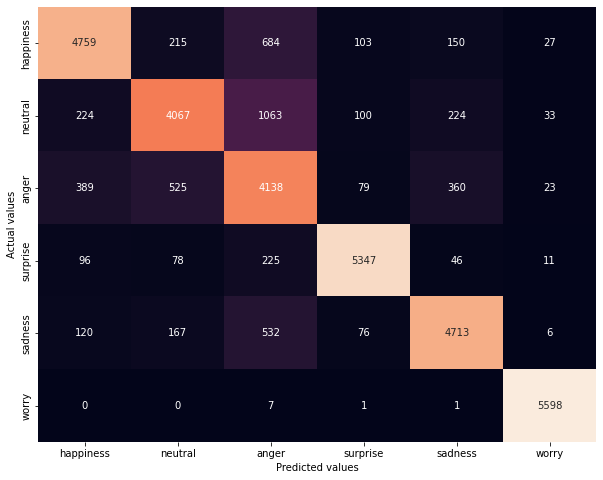

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test,prediction_xgb))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      5938
           1       0.81      0.71      0.76      5711
           2       0.62      0.75      0.68      5514
           3       0.94      0.92      0.93      5803
           4       0.86      0.84      0.85      5614
           5       0.98      1.00      0.99      5607

    accuracy                           0.84     34187
   macro avg       0.84      0.84      0.84     34187
weighted avg       0.84      0.84      0.84     34187



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
logreg.fit(x_train, y_train)
y_pred_test = logreg.predict(x_test)

In [ ]:
score = round(accuracy_score(y_test,y_pred_test)*100,2)
print("Score:",score)

Score: 75.69


In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,y_pred_test))
cnf_matrix = confusion_matrix(y_test,y_pred_test);
labels = ['happiness','neutral','anger','surprise','sadness','worry'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

Confusion Matrix for Decision Tree:
[[4257  275  652  293  359  102]
 [ 313 3761  943  196  427   71]
 [ 670  512 3269  266  741   56]
 [ 274  111  238 4934  189   57]
 [ 307  310  637  232 4079   49]
 [   7    0   14   10    0 5576]]


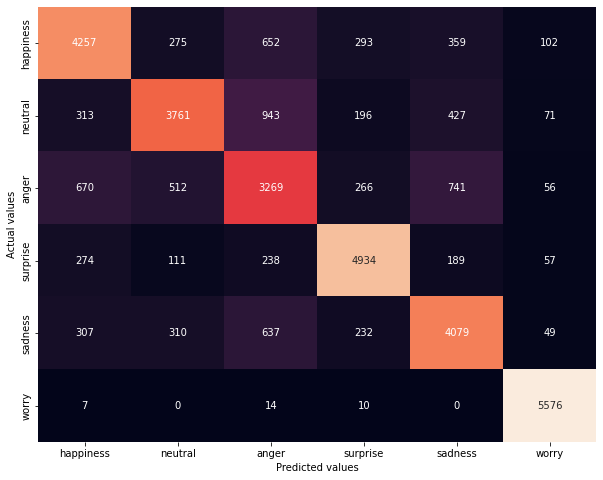

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      5938
           1       0.76      0.66      0.70      5711
           2       0.57      0.59      0.58      5514
           3       0.83      0.85      0.84      5803
           4       0.70      0.73      0.72      5614
           5       0.94      0.99      0.97      5607

    accuracy                           0.76     34187
   macro avg       0.76      0.76      0.76     34187
weighted avg       0.76      0.76      0.76     34187



In [ ]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(verbose = 2, random_state = 42)

In [ ]:
model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 26.51, NNZs: 15243, Bias: -1.108062, T: 79769, Avg. loss: 0.285441
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 25.64, NNZs: 16662, Bias: -1.071249, T: 159538, Avg. loss: 0.255731
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 25.35, NNZs: 17045, Bias: -1.075238, T: 239307, Avg. loss: 0.252250
Total training time: 0.10 seconds.
-- Epoch 4
Norm: 25.19, NNZs: 17222, Bias: -1.073186, T: 319076, Avg. loss: 0.251008
Total training time: 0.13 seconds.
-- Epoch 5
Norm: 25.09, NNZs: 17313, Bias: -1.060231, T: 398845, Avg. loss: 0.249973
Total training time: 0.15 seconds.
-- Epoch 6
Norm: 25.02, NNZs: 17367, Bias: -1.072841, T: 478614, Avg. loss: 0.249516
Total training time: 0.17 seconds.
-- Epoch 7
Norm: 24.95, NNZs: 17400, Bias: -1.068253, T: 558383, Avg. loss: 0.249112
Total training time: 0.20 seconds.
-- Epoch 8
Norm: 24.96, NNZs: 17420, Bias: -1.066157, T: 638152, Avg. loss: 0.248920
Total training time: 0.23 seconds.
-- Epoch 9
Norm: 24.95, NNZs: 17429, Bias

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 24.19, NNZs: 19974, Bias: -0.921313, T: 478614, Avg. loss: 0.227730
Total training time: 0.16 seconds.
-- Epoch 7
Norm: 24.15, NNZs: 19993, Bias: -0.921233, T: 558383, Avg. loss: 0.227406
Total training time: 0.18 seconds.
-- Epoch 8
Norm: 24.14, NNZs: 20013, Bias: -0.923270, T: 638152, Avg. loss: 0.227093
Total training time: 0.21 seconds.
-- Epoch 9
Norm: 24.11, NNZs: 20028, Bias: -0.917406, T: 717921, Avg. loss: 0.226945
Total training time: 0.23 seconds.
Convergence after 9 epochs took 0.23 seconds
-- Epoch 1
Norm: 17.20, NNZs: 20071, Bias: -0.627332, T: 79769, Avg. loss: 0.347325
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 15.35, NNZs: 21420, Bias: -0.685005, T: 159538, Avg. loss: 0.312721
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 14.65, NNZs: 21793, Bias: -0.710026, T: 239307, Avg. loss: 0.309077
Total training time: 0.09 seconds.
-- Epoch 4
Norm: 14.29, NNZs: 21960, Bias: -0.731855, T: 319076, Avg. loss: 0.307645
Total training time: 0.11 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.4s finished


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
y_pred_sgd = model.predict(x_test)

In [ ]:
score = round(accuracy_score(y_test,y_pred_sgd)*100,2)
print("Score:",score)

Score: 72.5


In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,y_pred_sgd))
cnf_matrix = confusion_matrix(y_test,y_pred_sgd);
labels = ['happiness','neutral','anger','surprise','sadness','worry'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

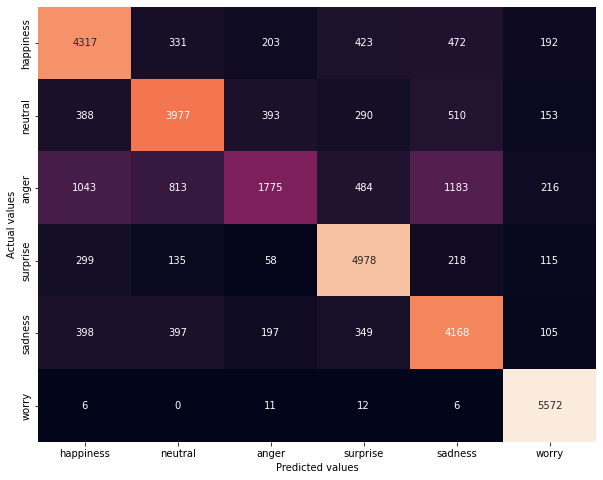

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y_pred_sgd))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70      5938
           1       0.70      0.70      0.70      5711
           2       0.67      0.32      0.44      5514
           3       0.76      0.86      0.81      5803
           4       0.64      0.74      0.68      5614
           5       0.88      0.99      0.93      5607

    accuracy                           0.73     34187
   macro avg       0.72      0.72      0.71     34187
weighted avg       0.72      0.73      0.71     34187



In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
MNB = MultinomialNB()
BNB = BernoulliNB()

In [ ]:
BNB.fit(x_train, y_train)
y2_BNB_model = BNB.predict(x_test)

In [ ]:
score = round(accuracy_score(y_test,y2_BNB_model)*100,2)
print("Score:",score)

Score: 73.25


In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,y2_BNB_model))
cnf_matrix = confusion_matrix(y_test,y2_BNB_model);
labels = ['happiness','neutral','anger','surprise','sadness','worry'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

Confusion Matrix for Decision Tree:
[[4058  431  730  318  316   85]
 [ 412 3829  691  300  411   68]
 [ 610  995 2955  265  598   91]
 [ 137  346  246 4905  127   42]
 [ 240  469  675  228 3919   83]
 [  16   67   97   24   26 5377]]


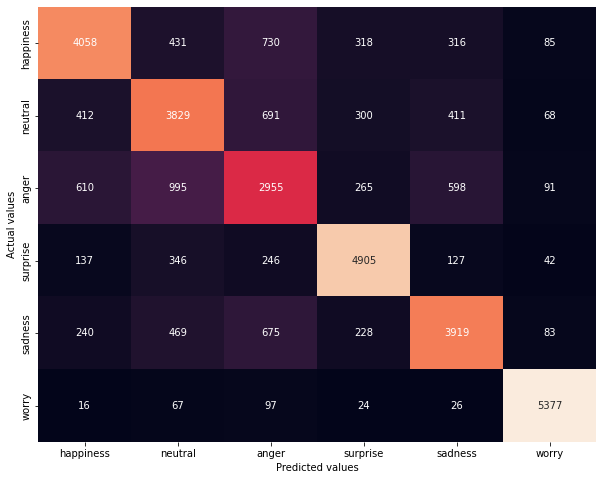

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y2_BNB_model))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71      5938
           1       0.62      0.67      0.65      5711
           2       0.55      0.54      0.54      5514
           3       0.81      0.85      0.83      5803
           4       0.73      0.70      0.71      5614
           5       0.94      0.96      0.95      5607

    accuracy                           0.73     34187
   macro avg       0.73      0.73      0.73     34187
weighted avg       0.73      0.73      0.73     34187



In [ ]:
from sklearn.svm import LinearSVC, NuSVC


In [ ]:

LSVC = LinearSVC()
NSVC = NuSVC(kernel='rbf',nu=0.01,verbose = 2)


In [ ]:
NSVC.fit(x_train,y_train)
y2_NSVC_model = NSVC.predict(x_test)

[LibSVM]

In [ ]:
score = round(accuracy_score(y_test,y2_NSVC_model)*100,2)
print("Score:",score)

Score: 90.05


In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,y2_NSVC_model))
cnf_matrix = confusion_matrix(y_test,y2_NSVC_model);
labels = ['happiness','neutral','anger','surprise','sadness','worry'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

Confusion Matrix for Decision Tree:
[[5510   80  291   17   38    2]
 [ 205 4154 1118   74  149   11]
 [ 316  518 4390   49  230   11]
 [   6   16   21 5749   11    0]
 [  13   59  159    6 5377    0]
 [   0    0    0    0    0 5607]]


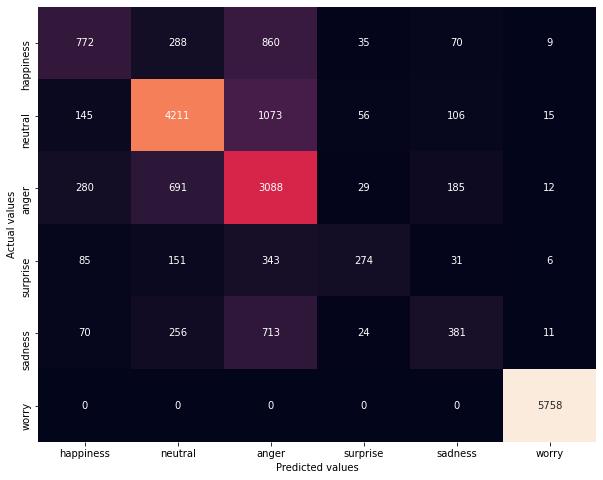

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

## bilstm

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2021-09-25 12:30:49--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-09-25 12:30:49--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-09-25 12:30:49--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
from keras.layers import Dropout, Dense, GRU, Embedding, LSTM, Bidirectional, TimeDistributed, Flatten,SimpleRNN,BatchNormalization;
from keras.models import Sequential;
from sklearn.feature_extraction.text import TfidfVectorizer;
from sklearn.metrics import matthews_corrcoef, confusion_matrix;
from sklearn import metrics;
from sklearn.utils import shuffle;
from keras.preprocessing.text import Tokenizer;
from keras.preprocessing.sequence import pad_sequences;
from sklearn.preprocessing import LabelEncoder;

# Logging
import logging;
logging.basicConfig(level=logging.INFO);

import warnings

unique_words = 0;
from tensorflow.keras.optimizers import Adam


In [ ]:
import torch;
import torch.nn as nn
import torch.optim as optim
import torchtext

In [ ]:
def loadData_Tokenizer(X_train, X_test,MAX_NB_WORDS=75000,MAX_SEQUENCE_LENGTH=500):
    text = np.concatenate((X_train, X_test),axis = 0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    unique_words = len(word_index);
    indices = np.arange(text.shape[0])
    # np.random.shuffle(indices)
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    f = open("glove.6B.100d.txt", encoding='utf-8')
    for line in f:
        try:
            values = line.split()
            word = values[0]
            try:
                coefs = np.asarray(values[1:], dtype='float32')
            except:
                pass
            embeddings_index[word] = coefs
        except UnicodeDecodeError:
            pass
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index, tokenizer)

In [ ]:
def Build_Model_BiLstm_Text(word_index, embeddings_index, nclasses,  MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=100, dropout=0.5):
    # Model building
    model = Sequential()
    hidden_layer = 3
    lstm_node = 32
    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) != len(embedding_vector):
                print("could not broadcast input array from shape", str(len(embedding_matrix[i])),
                      "into shape", str(len(embedding_vector)), " Please make sure your"
                                                                " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    print(lstm_node)
    for i in range(0,hidden_layer):
        model.add(Bidirectional(LSTM(lstm_node,return_sequences=True, recurrent_dropout=0.5)))
        model.add(Dropout(dropout))
    model.add(Bidirectional(LSTM(lstm_node, recurrent_dropout=0.5)))
    model.add(Dropout(dropout))
    #model.add(TimeDistributed(Dense(256)))
    #model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(nclasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
    return model

In [ ]:
train_final = df_train[['content', 'sentiment']]
print("Train DataFrame")
display(train_final.head(3))

Train DataFrame


,content,sentiment
0,thanks i will work on this next time,happiness
1,this comment killed me rip in pieces,sadness
2,would not the powder be derived from the cryst...,neutral


In [ ]:

# Label encoding target column
le = LabelEncoder()
train_final['sentiment'] = le.fit_transform(train_final['sentiment'])

## df for training and prediction
df = train_final

print(df['sentiment']);

0        1
1        3
2        2
3        1
4        1
        ..
48475    1
48476    4
48477    1
48478    3
48479    2
Name: sentiment, Length: 48480, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
preprocess = True
text = 'content'
target = 'sentiment'
MAX_SEQUENCE_LENGTH = 60

In [ ]:
X = df[text]
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_ada_norm, y_ada, test_size = 0.3)

In [ ]:
X_train
y_train

array([2, 0, 5, ..., 1, 4, 4])

In [ ]:
display(x_train)

for i in x_train:
  print(i)


<79769x27710 sparse matrix of type '<class 'numpy.float64'>'
	with 1156671 stored elements in Compressed Sparse Row format>

Streaming output truncated to the last 5000 lines.
  (0, 16934)	0.09436340434868866
  (0, 18423)	0.25524988250272357
  (0, 24745)	0.11043673207404223
  (0, 26024)	0.13424541800534345
  (0, 26896)	0.08708399126531519
  (0, 27131)	0.554753961285178
  (0, 8015)	0.5339027823554678
  (0, 9587)	0.41852171403853033
  (0, 4464)	0.42557592764957464
  (0, 22974)	0.41433493167706587
  (0, 10358)	0.31873806396322574
  (0, 14260)	0.20094390626614184
  (0, 832)	0.2121949131911148
  (0, 10978)	0.35574679893498334
  (0, 19307)	0.2848466531232906
  (0, 8953)	0.27959306179150495
  (0, 11618)	0.2640203808814977
  (0, 9463)	0.2961787521703316
  (0, 16198)	0.23846524070903047
  (0, 24460)	0.1578256949260009
  (0, 6577)	0.1580084155240591
  (0, 21814)	0.21560191082341387
  (0, 20501)	0.2891391709112422
  (0, 27307)	0.24120388075527754
  (0, 14787)	0.19730895669776893
  (0, 16811)	0.14908326698779156
  (0, 9334)	0.10967599432368409
  (0, 13088)	0.12674646864383163
  (0, 26652)	0.12321765082356778
  (0, 13930

In [ ]:
print("Generating Glove Embeddings...")
X_train_Glove,X_test_Glove, word_index,embeddings_index, tokenizer = loadData_Tokenizer(x_train,x_test, MAX_SEQUENCE_LENGTH=MAX_SEQUENCE_LENGTH)

Generating Glove Embeddings...


ValueError: ignored

In [ ]:
display(X_train_Glove);
display(y_train);

array([[    0,     0,     0, ...,     0,    16,   205],
       [    0,     0,     0, ...,    10,   486,  1081],
       [    0,     0,     0, ...,    78,     6, 13926],
       ...,
       [    0,     0,     0, ...,     4,     2,   295],
       [    0,     0,     0, ...,    79,  1805,    70],
       [    0,     0,     0, ...,    48,    34,  1478]], dtype=int32)

14921    1
15036    2
36525    0
36422    1
46792    2
        ..
42974    4
37658    4
27872    4
45711    0
47366    2
Name: sentiment, Length: 33936, dtype: int64

In [ ]:
display(X_test_Glove);
display(y_test);

array([[    0,     0,     0, ...,    62,     1,    91],
       [    0,     0,     0, ...,    69,    14,    12],
       [    0,     0,     0, ...,    17,   452,  2702],
       ...,
       [    0,     0,     0, ...,    21,    18, 13745],
       [    0,     0,     0, ...,  1611,   258,  5905],
       [    0,     0,     0, ...,  2363,     6,    15]], dtype=int32)

809      1
33689    1
32643    2
12317    2
43802    4
        ..
22593    2
30475    0
3093     1
41506    1
28262    0
Name: sentiment, Length: 14544, dtype: int64

In [ ]:
# Model Training
with warnings.catch_warnings():
    print("Building Model ...")
    model_bilstm = Build_Model_BiLstm_Text(word_index,embeddings_index, 6)
    model_bilstm.summary()
    print("\n Starting Training ... \n")
    history = model_bilstm.fit(X_train_Glove, y_train,
                              validation_data=(X_test_Glove, y_test),
                              epochs=5,
                              batch_size=256,
                              verbose=2)
    warnings.simplefilter("ignore")

Building Model ...
32
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 100)          2773800   
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 64)           34048     
_________________________________________________________________
dropout (Dropout)            (None, 500, 64)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 500, 64)           24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 64)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 500, 64)           24832     
_________________________________________________________________
dropout_2 (Dropout)          (None

133/133 - 156s - loss: 1.4318 - accuracy: 0.4218 - val_loss: 1.2369 - val_accuracy: 0.5298
Epoch 2/5
133/133 - 139s - loss: 1.2072 - accuracy: 0.5448 - val_loss: 1.1345 - val_accuracy: 0.5743
Epoch 3/5
133/133 - 139s - loss: 1.1037 - accuracy: 0.5931 - val_loss: 1.1283 - val_accuracy: 0.5750
Epoch 4/5
133/133 - 140s - loss: 1.0188 - accuracy: 0.6284 - val_loss: 1.0670 - val_accuracy: 0.6011
Epoch 5/5
133/133 - 139s - loss: 0.9326 - accuracy: 0.6670 - val_loss: 1.0851 - val_accuracy: 0.6007


In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string], '')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()



 Plotting results ... 



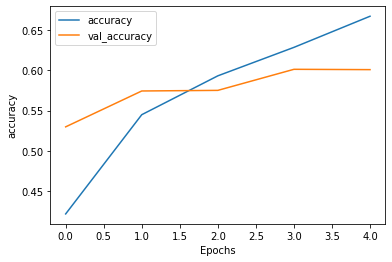

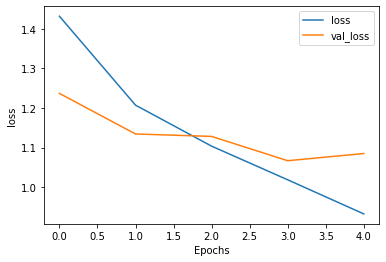

In [ ]:
print("\n Plotting results ... \n")
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
predict_x=model_bilstm.predict(X_test_Glove); 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
print(metrics.classification_report(y_test, classes_x));

              precision    recall  f1-score   support

           0       0.51      0.42      0.46      2041
           1       0.72      0.81      0.76      5666
           2       0.56      0.57      0.57      4288
           3       0.36      0.58      0.45       894
           4       0.47      0.23      0.31      1430
           5       0.00      0.00      0.00       225

    accuracy                           0.60     14544
   macro avg       0.44      0.43      0.42     14544
weighted avg       0.59      0.60      0.59     14544



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,classes_x))
cnf_matrix = confusion_matrix(y_test,classes_x);
labels = ['happiness','neutral','anger','surprise','sadness','worry'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

Confusion Matrix for Decision Tree:
[[ 858  307  527  279   70    0]
 [ 138 4598  705  152   73    0]
 [ 483  962 2441  207  195    0]
 [  70  163  125  518   18    0]
 [ 124  342  532  110  322    0]
 [  20   38   11  155    1    0]]


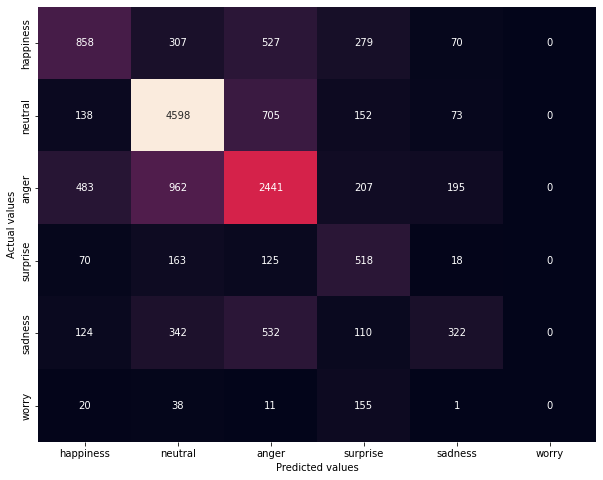

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
le = LabelEncoder()
train_final['sentiment'] = le.fit_transform(train_final['sentiment'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
tweets = df_train['content'].copy()
labels = train_final['sentiment'].copy()
display(tweets)
display(labels)

0                     thanks i will work on this next time
1                     this comment killed me rip in pieces
2        would not the powder be derived from the cryst...
3        must not have been the of his day but seriousl...
4        fair enough that is useful and relevant if ane...
                               ...                        
48475    hi let s not compare basketball to the man spe...
48476       you d be surprised how often that works though
48477    i don t think they really thought through the ...
48478                                              too bad
48479     and we are still in the eu help us when we leave
Name: content, Length: 48480, dtype: object

0        1
1        3
2        2
3        1
4        1
        ..
48475    1
48476    4
48477    1
48478    3
48479    2
Name: sentiment, Length: 48480, dtype: int64

In [ ]:
from keras.preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts(tweets)
t.fit_on_texts(tweets)
vocab_size_train = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(tweets)
# pad documents to a max length of 4 words
max_length = 60
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
display(tweets)

0                     thanks i will work on this next time
1                     this comment killed me rip in pieces
2        would not the powder be derived from the cryst...
3        must not have been the of his day but seriousl...
4        fair enough that is useful and relevant if ane...
                               ...                        
48475    hi let s not compare basketball to the man spe...
48476       you d be surprised how often that works though
48477    i don t think they really thought through the ...
48478                                              too bad
48479     and we are still in the eu help us when we leave
Name: content, Length: 48480, dtype: object

In [ ]:
tweets= padded_docs
display(tweets)


array([[ 69,   1,  41, ...,   0,   0,   0],
       [ 12, 228, 716, ...,   0,   0,   0],
       [ 34,  10,   2, ...,   0,   0,   0],
       ...,
       [  1, 120,  40, ...,   0,   0,   0],
       [ 63, 108,   0, ...,   0,   0,   0],
       [  9,  37,  15, ...,   0,   0,   0]], dtype=int32)

In [ ]:
embeddings_index = dict()
f = open('glove.6B.200d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [ ]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size_train, 
                             200))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [ ]:
e = Embedding(vocab_size_train, 200, weights=[embedding_matrix], input_length=100, trainable=False)

In [ ]:
print(tweets)

[[ 69   1  41 ...   0   0   0]
 [ 12 228 716 ...   0   0   0]
 [ 34  10   2 ...   0   0   0]
 ...
 [  1 120  40 ...   0   0   0]
 [ 63 108   0 ...   0   0   0]
 [  9  37  15 ...   0   0   0]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val= train_test_split(tweets,labels,test_size=0.3, random_state=42)
print(len(X_train))
print(type(X_train))
display(y_val)

33936
<class 'numpy.ndarray'>


39878    4
32957    1
31387    3
12781    0
664      2
        ..
7577     1
40638    1
12513    2
19367    4
9975     1
Name: sentiment, Length: 14544, dtype: int64

In [ ]:
opt = Adam(learning_rate=0.001, decay=1e-6)

In [ ]:
model=Sequential();
model.add(e);
model.add(SimpleRNN(100, dropout=0.5, recurrent_dropout=0.5))
model.add(BatchNormalization())
model.add(Dense(256, activation = "sigmoid"))
model.compile(optimizer= opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,batch_size=256,verbose=1)

Epoch 1/10


ValueError: ignored

In [ ]:
# Hyper-parameters
sequence_length = 60
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 6
batch_size = 100
num_epochs = 2
learning_rate = 0.01

In [ ]:
from torch import nn
class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):

        #x = [sent len, batch size]
        
        embedded = self.embedding(x)
        
        #embedded = [sent len, batch size, emb dim]
        
        output, hidden = self.rnn(embedded)
        
        #output = [sent len, batch size, hid dim]
        #hidden = [1, batch size, hid dim]
        
        assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        
        out = self.fc(hidden)
        return out;

In [ ]:
INPUT_DIM = len(word_index)
EMBEDDING_DIM = 100
HIDDEN_DIM = 374
OUTPUT_DIM = 2
BATCH_SIZE = 60

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



In [ ]:


model = model.to(device)
criterion = criterion.to(device)



In [ ]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    preds, ind= torch.max(F.softmax(preds, dim=-1), 1)
    correct = (ind == y).float()
    acc = correct.sum()/float(len(correct))
    return acc

In [ ]:


def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    bar = pyprind.ProgBar(len(iterator), bar_char='█')
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device);
        labels = labels.to(device);
        optimizer.zero_grad()
                
        predictions = model(images).squeeze(0)
        print(predictions.shape)
        loss = criterion(predictions.squeeze(0), labels.flatten())
        print(loss.shape)
        acc = binary_accuracy(predictions, labels)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        bar.update()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)


In [ ]:
!pip install pyprind

In [ ]:
import pyprind

In [ ]:

from torchtext.legacy import data
import spacy
spacy_en = spacy.load('en')

In [ ]:
TEXT = data.Field(sequential=True, tokenize="spacy")
LABEL = data.LabelField(dtype=torch.long, sequential=False)

In [ ]:
print(len(X_train_Glove));
print(len(y_train))

33936
33936


In [ ]:
print(len(X_test_Glove));
print(len(y_test));

14544
14544


TypeError: ignored

In [ ]:

N_EPOCHS = 5

for epoch in range(N_EPOCHS):

    train_loss, train_acc = train(model,train_loader, optimizer, criterion)
    # valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')

NameError: ignored

In [ ]:
import tensorflow as tf

In [ ]:
train_dataset_zipped = list(zip(X_train_Glove,y_train));
print(type(X_train_Glove))
test_dataset_zipped = list(zip(X_test_Glove,y_test));
print(len(train_dataset_zipped))
print(len(test_dataset_zipped))

<class 'numpy.ndarray'>
33936
14544


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset_zipped, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset_zipped, 
                                          batch_size=batch_size, 
                                          shuffle=False) 
print(len(train_loader));
print(len(test_loader));

340
146


In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        print(input_size)
    def forward(self, x):
        # Set initial hidden and cell states 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)


28


In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.viewreshape(1,-1).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total)) 

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

RuntimeError: ignored

In [ ]:
import torch.nn as nn
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()
       
        self.embedding_1 = nn.Embedding(input_dim, embedding_dim)
        self.rnn_1 = nn.RNN(embedding_dim, hidden_dim)
        self.linear_1 = nn.Linear(hidden_dim, output_dim)

        self.embedding_2 = nn.Embedding(input_dim, embedding_dim)
        self.rnn_2 = nn.RNN(embedding_dim, hidden_dim)
        self.linear_2 = nn.Linear(hidden_dim, output_dim)

        self.embedding_3 = nn.Embedding(input_dim, embedding_dim)
        self.rnn_3 = nn.RNN(embedding_dim, hidden_dim)
        self.linear_3 = nn.Linear(hidden_dim, output_dim)
        
        
        
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):

        #x = [sent len, batch size]
        
        embedded = self.embedding(x)
        
        #embedded = [sent len, batch size, emb dim]
        
        output, hidden = self.rnn(embedded)
        
        #output = [sent len, batch size, hid dim]
        #hidden = [1, batch size, hid dim]
        
        assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        
        out = self.fc(hidden)
        return out;

In [ ]:
iter = 0
N_EPOCHS = 100
for epoch in range(N_EPOCHS):
    for i, (images,labels) in enumerate(train_loader):
 
        images = images.to(device)
        labels = labels.view(-1, 2 * 1).to(device)
 
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        vec_tensor = torch.tensor(images, device="cpu")
        # Forward pass to get output/logits
        outputs = model(vec_tensor) 
 
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
 
        # Getting gradients w.r.t. parameters
        loss.backward()
 
        # Updating parameters
        optimizer.step()
 
        iter += 1
 
        if iter % 10 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.to(device)
 
                # Forward pass only to get logits/output
                outputs = model(images)
 
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
 
                # Total number of labels
                total += labels.size(0)
 
 
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()
 
            accuracy = 100 * correct.item() / total
 
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()


ValueError: ignored

In [ ]:

print(type(X_train_Glove))
print(type(tf.convert_to_tensor(X_train_Glove, dtype=tf.float32)));

<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
import re
import os
import nltk
import string
import datetime
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.metrics import Metric
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:
df_train.content

0                     thanks i will work on this next time
1                     this comment killed me rip in pieces
2        would not the powder be derived from the cryst...
3        must not have been the of his day but seriousl...
4        fair enough that is useful and relevant if ane...
                               ...                        
48475    hi let s not compare basketball to the man spe...
48476       you d be surprised how often that works though
48477    i don t think they really thought through the ...
48478                                              too bad
48479     and we are still in the eu help us when we leave
Name: content, Length: 48480, dtype: object

In [ ]:
sentence_length = []
count = Counter()
for i in df_train.content:
  temp = i.split()
  sentence_length.append(len(temp))
  for j in temp:
    count[j] += 1

In [ ]:
num_words = len(count)
max_length = max(sentence_length)
print('num_words: ',num_words,' max_length: ',max_length)

num_words:  27737  max_length:  40


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(df_train['content'])
word_index = tokenizer.word_index
display(word_index)

{'i': 1,
 'the': 2,
 'is': 3,
 'to': 4,
 'a': 5,
 'you': 6,
 'it': 7,
 'that': 8,
 'and': 9,
 'not': 10,
 'of': 11,
 'this': 12,
 'in': 13,
 'for': 14,
 'are': 15,
 'have': 16,
 'was': 17,
 'my': 18,
 'but': 19,
 'be': 20,
 'on': 21,
 'so': 22,
 'just': 23,
 'do': 24,
 'they': 25,
 'he': 26,
 'like': 27,
 'with': 28,
 'me': 29,
 'what': 30,
 'your': 31,
 'am': 32,
 's': 33,
 'would': 34,
 'if': 35,
 'as': 36,
 'we': 37,
 'at': 38,
 'all': 39,
 't': 40,
 'will': 41,
 'about': 42,
 'no': 43,
 'can': 44,
 'love': 45,
 'one': 46,
 'get': 47,
 'people': 48,
 'good': 49,
 'she': 50,
 'how': 51,
 'there': 52,
 'out': 53,
 'up': 54,
 'from': 55,
 'an': 56,
 'really': 57,
 'or': 58,
 'know': 59,
 'did': 60,
 'think': 61,
 'when': 62,
 'too': 63,
 'more': 64,
 'her': 65,
 'them': 66,
 'his': 67,
 'him': 68,
 'thanks': 69,
 'now': 70,
 'has': 71,
 'lol': 72,
 'time': 73,
 'some': 74,
 'see': 75,
 'because': 76,
 'who': 77,
 'thank': 78,
 'm': 79,
 'had': 80,
 'why': 81,
 'much': 82,
 'still': 83,

In [ ]:
train_text = tokenizer.texts_to_sequences(X_train)
test_text = tokenizer.texts_to_sequences(X_test)

In [ ]:
train_padding = pad_sequences(
    X_train_Glove, maxlen=max_length, padding='post', truncating='post'
)
test_padding = pad_sequences(
    X_test_Glove, maxlen=max_length, padding='post', truncating='post'
)

In [ ]:
print(len(train_padding))
print(len(test_padding))

33936
14544


In [ ]:
lr = 0.0001
epoch_num = 20
unit1 = 64
unit2 = 128
unit3 = 256
embedding_output = 32

In [ ]:
def rnn_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_output,input_length=max_length),
    tf.keras.layers.SimpleRNN(unit1, return_sequences=True,activation='relu'),
    tf.keras.layers.SimpleRNN(unit2, return_sequences=True,activation='relu'),
    tf.keras.layers.SimpleRNN(unit3),
    tf.keras.layers.Dense(1,activation='sigmoid'),
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['TruePositives','TrueNegatives','FalsePositives','FalseNegatives','accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
  return model

In [ ]:
model = rnn_model()



In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)



In [ ]:
rnn_model_result = model.fit(
     train_padding, y_train, epochs=epoch_num, verbose=2,
     validation_data = (test_padding,y_test),
     callbacks=[tensorboard_callback]
)

Epoch 1/20
1061/1061 - 80s - loss: -1.9523e+01 - true_positives: 29211.0000 - true_negatives: 3.0000 - false_positives: 4693.0000 - false_negatives: 29.0000 - accuracy: 0.3853 - precision_3: 0.8616 - recall_3: 0.9990 - val_loss: -2.8861e+01 - val_true_positives: 12566.0000 - val_true_negatives: 0.0000e+00 - val_false_positives: 1978.0000 - val_false_negatives: 0.0000e+00 - val_accuracy: 0.3925 - val_precision_3: 0.8640 - val_recall_3: 1.0000
Epoch 2/20
1061/1061 - 76s - loss: -3.7512e+01 - true_positives: 29240.0000 - true_negatives: 0.0000e+00 - false_positives: 4696.0000 - false_negatives: 0.0000e+00 - accuracy: 0.3855 - precision_3: 0.8616 - recall_3: 1.0000 - val_loss: -4.5741e+01 - val_true_positives: 12566.0000 - val_true_negatives: 0.0000e+00 - val_false_positives: 1978.0000 - val_false_negatives: 0.0000e+00 - val_accuracy: 0.3925 - val_precision_3: 0.8640 - val_recall_3: 1.0000
Epoch 3/20
1061/1061 - 76s - loss: -5.4416e+01 - true_positives: 29240.0000 - true_negatives: 0.0000e

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 40, 32)            887584    
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 40, 64)            6208      
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 40, 128)           24704     
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 256)               98560     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 1,017,313
Trainable params: 1,017,313
Non-trainable params: 0
_________________________________________________________________
